# COGS 108 - Final Project 

# Overview

The increasing variety of mobile apps available is due to the growing prevalence of technology. This presents numerous services for users and also increased opportunities for businesses to grow through applications. Through analyzing a dataset on iOS Mobile App Statistics, we look to reveal whether there is a relationship between the cost and user ratings of apps to study the balance between company gains and customer satisfaction. Analyzing this relationship will allow us to either prove or disprove our prediction that the price of apps corresponds to its features and quality, which is a common expectation for users. 

## Link to Github Repository:
    
https://github.com/emilyrtam/COGS-107-HER_d

# Names

- Diana Chong [A14627769]
- Skylar Hom [A13022643]
- Tricia Pham [A14107552]
- Sofia Sanchez [A92130382]
- Emily Tam [A14873136]

# Research Question

Is there a measurable relationship between mobile iOS app store prices and application user ratings? Furthermore, does the group (of categories) of an app have an effect on either of these variables?

## Background and Prior Work

Mobile technology has revolutionized how much of the world functions. It has the fastest growth of any technology in history (West, 2015). The speed of information that can be transferred across the globe has astronomically increased. Furthermore, the use of mobile technology has changed the relationship between businesses and consumers (West, 2015). The market for mobile devices, such as smartphones and tablets, has grown in tandem. A study conducted by the Pew Research Center concluded that around 90% of Americans currently have some form of mobile device (West, 2015). One primary component of mobile devices are the applications that are on the phone. They appear as bubble icons on the device’s display that are loaded by tapping on them. Application use is the primary way that users interact with their phones. A few applications are preloaded onto the phone. However, a significant number of applications must be downloaded from a host. For Apple phones, the Apple Store supplies nearly all of the applications that users can choose to download.

Upon the opening of the Apple Store, an “app economy” bloomed. The app economy is the development, marketing, and consumption of mobile applications (Dyer-Witheford, 2014). A significant portion of the software development field is dedicated towards the creation and maintenance of mobile applications (Dyer-Witheford, 2014). Due to the sheer scale of mobile applications, it is crucial for both companies and consumers to understand current trends in the app market. There is a huge spread of variability within the application market -- the type of application, such as social apps, games, or services; the price of the application; the company behind the development of the application; and the services that the application provides. Also, there are demographic trends for users of certain apps, such as age and gender, and statistical trends for products, like user ratings.  

On the company's end, the pricing of apps is mainly driven by a desired end result. Whether a group is striving for user numbers or aiming to make large profits determines if an application is free or paid. However, these desired goals are balanced by what customers are willing to pay for the product which is influenced by perceived quality and level of necessity. If customer reviews are in favor of the product and listed features align with user needs, people are more likely to see it as worthwhile. Since there are an abundant number of free iOS apps, choosing to not make an application free automatically raises the users’ expectations that what they are paying for will be worth the extra dollars that another product may not be asking for. It is up to a company to ensure their app fulfills expectations which goes on to affect if an individual is willing to pay for something they have not been able to even use yet.

User ratings are quite subjective and they encompass a variety of user profiles that conjunctively measure if the quality of a product is worth its monetary value. Ratings can be generally higher for paid apps as customers believe they are getting more and quality matches up to a price point. However, ratings can also be lower as high expectations can exceed what the app provides. General trends of iOS app ratings in relation to prices are largely influenced by the level of uncertainty users have when searching for a tool (Song, Kim, Jones, Baker, & Chin, 2014). This uncertainty, ranging from knowing exactly what is expected from the company’s products to needing an application as a first resource, influences expectations and demands which is reflected upon user app ratings. 




References (include links):
- 1) Dyer-Witheford, N. (2014). App Worker. In Miller P. & Matviyenko S. (Eds.), The Imaginary App (pp. 127-142). 
MIT Press. Retrieved from http://www.jstor.org/stable/j.ctt9qf91w.16
- 2) Song, J., Kim, J., Jones, D. R., Baker, J., Chin, W. W. (2014). Application discoverability and user satisfaction in mobile application stores: An environmental psychology perspective. Elsevier, 59, 37-51. Doi: https://doi.org/10.1016/j.dss.2013.10.004
- 3)West, D. (2015). MOBILE TECHNOLOGY. In Going Mobile: How Wireless Technology is Reshaping Our Lives 
(pp. 1-15). Brookings Institution Press. Retrieved from http://www.jstor.org/stable/10.7864/j.ctt7zsvqt.4


# Hypothesis


Null Hypothesis: There is no relationship between iOS app prices and user ratings.

Alternative Hypothesis: There is a relationship between iOS app prices and user ratings.

We hypothesize that apps with higher prices will have higher ratings than applications with lower prices (or are free). This is because an app with higher prices should have more work put into it because a business believes it is worth a fee. As such, an app with more resources allocated towards its creation will be of higher quality, which will improve a user’s experience with the app and will lead users to rate the app more highly. Additionally, we hypothesize that different app groups will have different prices, because certain groups seem more likely to encourage in-app purchases after initial download. We predict that utilities apps will be the most expensive, then lifestyle, information, and recreation, and finally trending apps will be the least expensive. 

# Dataset(s)

- Dataset Name: Mobile App Statistics (Apple iOS app store) dataset 
- Link to the dataset: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv
- Number of observations: 7197 observations, 16 variables
- Description: We are utilizing the dataset “Mobile App Statistics (Apple iOS app store)” from Kaggle to analyze statistics about Apple iOS applications. The dataset provides data regarding variables such as ratings, prices and genres of 7,197 different apps. For such variables, user rating is measured on a 0-5-point scale, prices are in US dollars, and include app categories such as Games, Health & Fitness and Utilities. 


# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in app data
df = pd.read_csv('AppleStore.csv')

In [3]:
#Check what data looks like
df.head()

#df_desc.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# Data Cleaning

First we need to clean the data so that it better addresses the question we have. We are looking at the relationship between ratings and app price, so we can delete the other columns that are not related to these topics. We then change the names of the columns to be more reader-friendly. Genre/Category is kept in the data set because it may be useful for later analysis. 

In [4]:
#Check columns
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
#Remove unneeded columns (columns not used in our analysis)
df = df.drop(columns = ['Unnamed: 0', 'id', 'size_bytes', 'currency', 
                        'rating_count_ver', 'user_rating_ver', 'ver',
                        'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 
                        'lang.num', 'vpp_lic'], axis = 1)

In [6]:
#Rename columns
df.columns = ['app_name', 'app_store_price (USD)', 'rating_count', 'user_rating',
              'category']
df.head()

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference


Before we can start analyzing the data, we need to remove any unnecessary or possibly problematic data points. We first check to see if there were any rows that were empty in the data set. Then we take out rows where the rating_count is equal to zero. Those rows would usually have a zero for the rating_count column and the user_rating column. No user ratings is different from a user rating of zero, so these rows are taken out so it won’t skew the data. Outliers are also taken out of the data set.

In [7]:
#Check to see if there are any rows with empty data cells
empty_rows = df[df.isnull().any(axis=1)]
len(empty_rows)

0

In [8]:
#Remove rows where the rating_count = 0
df = df[df['rating_count'] != 0]

In [9]:
#Removes all rows with a price greater than $9.99 
#(price chosen because 90% of apps are in the $0 to $9.99 range)

df = df[df['app_store_price (USD)'] < 10]

#### Grouping:

We decided to group the original genre categories into larger groups. This is because we had 23 different categories in our dataset, with some genres being underrepresented. As such, we decided to create 5 overall groups (‘Recreation’, ‘Lifestyle’, ‘Information’, ‘Utilities’, and ‘Trending’). These five groups represent the following general themes we found within our dataset:

- Recreation is largely composed of ‘Games’, which is the largest category in our dataset.
- Lifestyle includes the ‘Health & Fitness’ and ‘Travel’ genres, which has apps that promote changes in daily life.
- Information includes ‘Education’ and ‘Book’, which helps with scholastic pursuits.
- Utilities has the ‘Productivity’ and ‘Music’ genres, which includes apps that improve the capabilities of the user’s phone.
- Trending includes ‘News’ and ‘Social Networking’, which has information that is currently updating.


In [10]:
#Sort categories into larger groups by adding an additional column 'group' to df

df['group'] = df['category']

#Recreation Group
df['group'].replace('Games','Recreation', inplace=True)
df['group'].replace('Entertainment','Recreation', inplace=True)

#Lifestyle Group
df['group'].replace('Health & Fitness','Lifestyle', inplace=True)
df['group'].replace('Lifestyle','Lifestyle', inplace=True)
df['group'].replace('Shopping','Lifestyle', inplace=True)
df['group'].replace('Finance','Lifestyle', inplace=True)
df['group'].replace('Travel','Lifestyle', inplace=True)
df['group'].replace('Food & Drink','Lifestyle', inplace=True)
df['group'].replace('Navigation','Lifestyle', inplace=True)
df['group'].replace('Medical','Lifestyle', inplace=True)
df['group'].replace('Catalogs','Lifestyle', inplace=True)

#Information Group
df['group'].replace('Education','Information', inplace=True)
df['group'].replace('Book','Information', inplace=True)
df['group'].replace('Reference','Information', inplace=True)

#Utilities Group
df['group'].replace('Productivity','Utilities', inplace=True)
df['group'].replace('Utilities','Utilities', inplace=True)
df['group'].replace('Photo & Video','Utilities', inplace=True)
df['group'].replace('Music','Utilities', inplace=True)
df['group'].replace('Business','Utilities', inplace=True)

#Trending Group
df['group'].replace('Social Networking','Trending', inplace=True)
df['group'].replace('Sports','Trending', inplace=True)
df['group'].replace('Weather','Trending', inplace=True)
df['group'].replace('News','Trending', inplace=True)

df.head()

,app_name,app_store_price (USD),rating_count,user_rating,category,group
0,PAC-MAN Premium,3.99,21292,4.0,Games,Recreation
1,Evernote - stay organized,0.00,161065,4.0,Productivity,Utilities
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather,Trending
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping,Lifestyle
4,Bible,0.00,985920,4.5,Reference,Information


# Data Analysis & Results

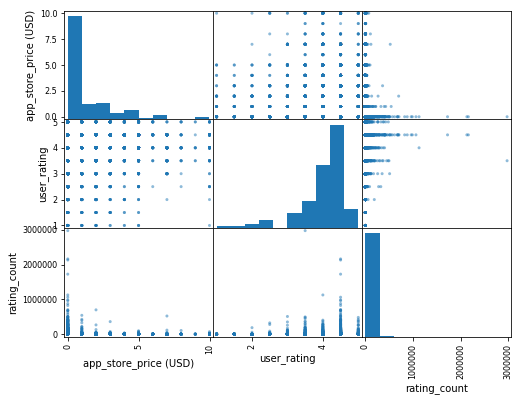

In [11]:
#Plot the data in a scatter matrix
fig = pd.plotting.scatter_matrix(df[['app_store_price (USD)', 'user_rating', 
                                     'rating_count']], figsize=(8,6))

plt.show()

#### Interpretation of graph above: 
Shows a general distribution of app store prices, user ratings, and rating counts. Due to the nature of the data (non parametric data, with user rating being an ordinal value), the scatter plots appear linear.

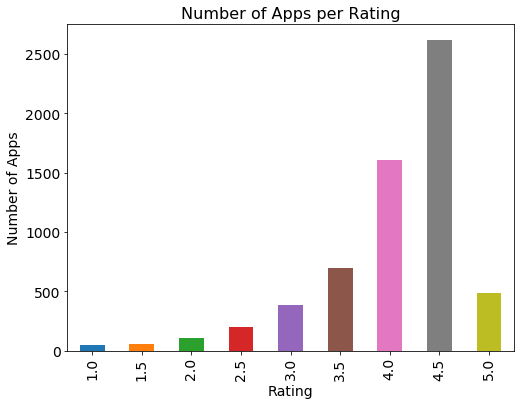

In [12]:
#Bar graph showing number of apps per rating
rating = df['user_rating'].value_counts()
rating_order = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Rating', fontsize = 16)

rating.loc[rating_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above: 
There are considerably more high ratings than low ratings. A rating of 4.5 is significantly more common than
other options. A 1.0 rating is very rare. The counts also mostly follow a linear distrubtion: the most common rating is a 4.5, and the values decrement in order of rating. The exception is a 5.0 rating, which is the 4th most common rating.

It is important to note that the ratings data is ordinal: it is ranked data. As such, the "weight" or "value" of each rating value differs. For example, a 1.0 is significantly different than a 3.0. Furthermore, while each 0.5 step is numerically similar, it can have distinct differences in rank. The 4.5 to 5.0 difference is significantly more than the 3.5 to 4.0, for example.

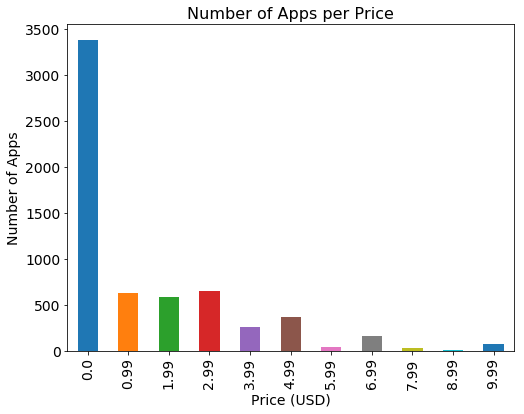

In [13]:
#Bar graph showing number of apps per price
price = df['app_store_price (USD)'].value_counts()
price_order = [0.0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 9.99]

plt.xlabel('Price (USD)', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Price', fontsize = 16)

price.loc[price_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above: 

There are considerably more apps that are free than at any other price point. Following the free apps, the \\$2.99, \\$0.99, and \\$1.99 respectively are the most popular. However, they are considerably less common than the free apps. In our data set, there are 3,383 apps that are mostly free. The next most common price, \\$2.99, has only 650 apps.

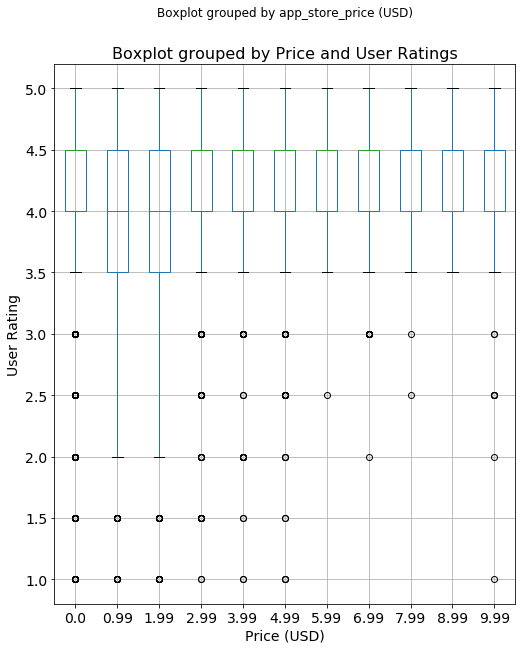

In [14]:
#Boxplot that groups app store price by user ratings to 
#understand the trend of app store ratings for each price

df.boxplot(column=['user_rating'], by=['app_store_price (USD)'], fontsize = 14,
           figsize=(8,10))

plt.xlabel('Price (USD)', fontsize = 14)
plt.ylabel('User Rating', fontsize = 14)
plt.title('Boxplot grouped by Price and User Ratings', fontsize = 16)
plt.show()

#### Interpretation of graph above: 
The boxplot shows the average user rating by prices up to \\$10. Prices up to \\$10 were chosen as to better see the boxes. Due to the nature of our data (non-parametric ordinal data), the boxes align exactly at rating data points. This results in the grid-like boxplot shown above. The range of user ratings for each price all lie within the 4.0-4.5 range, with the 1st and 3rd quartiles all being within this range. The exception is with apps that are \\$0.99 and \\$1.99, which have a Q1 of 3.5.

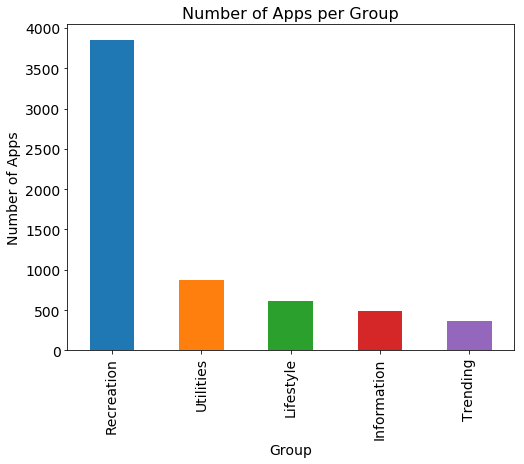

In [15]:
#Box plot showing number of apps per group
group = df['group'].value_counts()

plt.xlabel('Group', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Group', fontsize = 16)

group.plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above: 

Due to the size of the 'Games' category, the Recreation group is significantly larger than the other groups. Despite the distribution that was due to the size of one category of the dataset before grouping, the other groups are relatively similar to one another. All groups have at least 300 apps, which was our goal when making the groups.

In [16]:
#Creating a separate dataframe for each group

#Recreation Group
df_rec = df
df_rec = df_rec[df.group == 'Recreation']
df_rec = df_rec.drop(columns =['app_name','category','group'], axis=1)

#Utilities Group
df_utilities = df
df_utilities = df_utilities[df.group == 'Utilities']
df_utilities = df_utilities.drop(columns =['category','group'], axis=1)

#Lifestyle Group
df_life = df
df_life = df_life[df.group == 'Lifestyle']
df_life = df_life.drop(columns =['category','group'], axis=1)

#Information Group
df_info = df
df_info = df_info[df.group == 'Information']
df_info = df_info.drop(columns =['category','group'], axis=1)

#Trending Group
df_trending = df
df_trending = df_trending[df.group == 'Trending']
df_trending = df_trending.drop(columns =['category','group'], axis=1)

In [17]:
#Finding the average prices and ratings per group

#Recreation group mean
df_rec = df_rec.mean()
df_rec

app_store_price (USD)        1.362993
rating_count             14765.904984
user_rating                  4.124351
dtype: float64

In [18]:
#Utilities group mean
df_utilities = df_utilities.mean()
df_utilities

app_store_price (USD)        1.911657
rating_count             14242.365938
user_rating                  3.996548
dtype: float64

In [19]:
#Lifestyle group mean
df_life = df_life.mean()
df_life

app_store_price (USD)        1.169579
rating_count             14048.556634
user_rating                  3.901294
dtype: float64

In [20]:
#Information group mean
df_info = df_info.mean()
df_info

app_store_price (USD)       2.242224
rating_count             6148.834694
user_rating                 4.004082
dtype: float64

In [21]:
#Trending group mean
df_trending = df_trending.mean()
df_trending

app_store_price (USD)        0.772139
rating_count             32695.436111
user_rating                  3.656944
dtype: float64

In [22]:
#Create a dataframe with the mean for all the groups
df_group = df.groupby('group').mean()

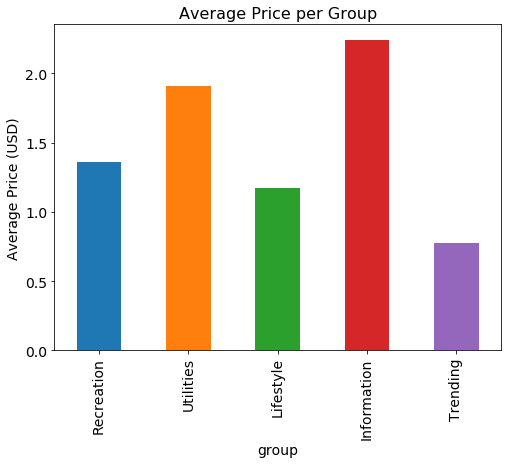

In [23]:
#Average price per group
group_price = df_group['app_store_price (USD)']
group_order = ['Recreation', 'Utilities', 'Lifestyle', 'Information', 'Trending']

plt.xlabel('Group', fontsize = 14)
plt.ylabel('Average Price (USD)', fontsize = 14)
plt.title('Average Price per Group', fontsize = 16)

group_price.loc[group_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above:

The group averages for price are relatively similar to one another. This aligns with the data collected previously: the lower end prices (\\$0.00 - \\$2.99) are the most common pricing options for the apps in our dataset. In our groups, Information has the highest average price of \\$2.24, while Trending has the lowest at \\$0.77. The largest group, Recreation, has an average price of \\$1.36.

## Statistical Tests

In [24]:
# See relationship between app price and user rating
df[['app_store_price (USD)', 'user_rating']].groupby(['user_rating']).describe()

app_store_price (USD)                                            \
                            count      mean       std  min  25%   50%   75%   
user_rating                                                                   
1.0                          43.0  1.390233  2.045286  0.0  0.0  0.99  1.99   
1.5                          56.0  1.208929  1.419337  0.0  0.0  0.99  1.99   
2.0                         106.0  1.155755  1.737413  0.0  0.0  0.00  1.99   
2.5                         196.0  1.103214  1.948201  0.0  0.0  0.00  1.99   
3.0                         382.0  1.252199  1.936959  0.0  0.0  0.00  1.99   
3.5                         695.0  1.522000  2.175266  0.0  0.0  0.00  2.99   
4.0                        1603.0  1.591684  2.271349  0.0  0.0  0.00  2.99   
4.5                        2620.0  1.425744  2.089482  0.0  0.0  0.00  2.99   
5.0                         488.0  1.478832  2.144816  0.0  0.0  0.00  1.99   

                   
              max  
user_rating        
1.0          9.99  
1.5          4.99  
2.0          9.99  
2.5          9.99  
3.0          9.99  
3.5          9.99  
4.0          9.99  
4.5          9.99  
5.0          9.99

In [25]:
# only view these two variables
df[['app_store_price (USD)', 'user_rating']].corr()

,app_store_price (USD),user_rating
app_store_price (USD),1.000000,0.024655
user_rating,0.024655,1.000000


After an initial examination of the two variables, there seems to be a very weak correlation between the two (0.0246). We now want to single out the means of the prices per user rating. These values better represent how much an app would cost for a particular user rating. 

In [26]:
df2 = df.groupby('user_rating').mean()
df2

,app_store_price (USD),rating_count
user_rating,,
1.0,1.390233,30.232558
1.5,1.208929,203.500000
2.0,1.155755,2907.235849
2.5,1.103214,5419.933673
3.0,1.252199,7502.861257
3.5,1.522000,15656.435971
4.0,1.591684,7943.392389
4.5,1.425744,22369.696947
5.0,1.478832,12802.922131


Based on the data in df2, we can create a model to predict future data points. 

In [27]:
#1 degree linear model
a1,b1 = np.polyfit(df2['app_store_price (USD)'], df2.index, 1)
a1, b1

(4.7822995472830661, -3.4447276537063565)

a1 (4.7823) represents the slope (m) in a standard line equation of y = m * x + b. b1 (-3.4447) represents the y-intercept (b) of the same equation. We can use these points to graph a line that predicts the trend of average app store price on user ratings.

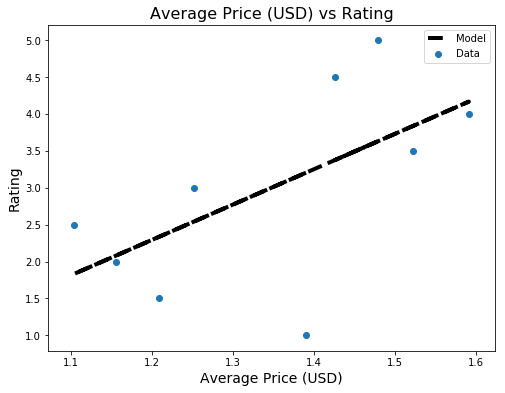

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df2['app_store_price (USD)'], df2.index, label='Data')

xs = df2['app_store_price (USD)']
ys = 4.7823 * xs - 3.4447
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Average Price (USD)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('Average Price (USD) vs Rating', fontsize=16)
plt.legend()
plt.show()

#### Interpretation of graph above:

Each datapoint represents the average price of a certain rating by half step (each numerical 0.5 increment). Our analyis shows that higher ratings generally have a higher average price. Furthermore, the lower ratings tend to have a lower average price. The model shows an upwards trend. The data suggests that higher average price leads to a higher average rating.

Furthermore, it is of note that the average price as distributed among the ratings all lies within close proximity to one another (\\$1.10 through \\$1.60).

### Mann-Whitney U Test:

The dataset for this project contains nonparametric statistics, so normal statistical tests cannot be used. The Ratings variable is an ordinal number, meaning that there is a meaning to the way the numbers are ranked. A 1.0 rating, for example, is much worse than 5.0 rating. Because of this nonparametric quality, we will use the Mann-Whitney U test to analyze the data. Unlike most statistical tests, this one does not require that the data have a normal distribution. The Mann-Whitney U test compares the distribution of two groups and determines whether they are equal or not.

In [29]:
# Set up a helper function for checking p-values against an alpha level, 
# and printing result

alpha = 0.05

def check_test(p_val, alpha):
    if p_val > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [30]:
# Using Mann-Whitney U test to check difference between distributions
MW_stat, MW_p_val = stats.mannwhitneyu(df2.index, df2['app_store_price (USD)'])
MW_stat, MW_p_val

(11.0, 0.0052221355506851131)

In [31]:
# Check p-value of Mann-Whitney U test
check_test(MW_p_val, alpha)

Different distribution (reject H0)


Using the Mann-Whitney U test, we find that the p-value of the test is 0.00522. We then compare the p-value with the standard alpha of 0.05 and see that the p-value is smaller than the alpha, and we can reject the null hypothesis. This means that there is statistical evidence to show that there is a difference between the distributions.

Another test that can be used for nonparametric statistics is the Kolgomorov-Smirnov test. This test compares the cumulative distributions between two groups. This test also has the same null and alternate hypotheses as the Mann-Whitney U test.

In [32]:
# Using a two-sample Kolmogorov-Smirnov test to check difference in distribution
KS_stat, KS_p_val = stats.ks_2samp(df2.index, df2['app_store_price (USD)'])
KS_stat, KS_p_val

(0.77777777777777779, 0.0034507242661324117)

In [33]:
# Check p-value of Kolmogorov-Smirnov test
check_test(KS_p_val, alpha)

Different distribution (reject H0)


The Kolmogorov-Smirnov test gives us a p-value of 0.00345. This value is also smaller than the alpha of 0.05 therefore we can still reject the null hypothesis. There is only a ~0.35% chance that the data observed is based off of chance.

In [34]:
#1 degree linear model for Recreation Group
a1,b1 = np.polyfit(df_group['app_store_price (USD)'], df_group['user_rating'], 1)
a1, b1

(0.19180539209708791, 3.650524192860213)

### Group data

This analysis examines the effect of the genre (as previously sorted into groups) on app price and rating.

In [35]:
#Take mean price and mean rating from Recreation dataframe
rec_mean = pd.DataFrame({'group': 'rec',
                        'price_mean': [df_rec[0]],
                        'rating_mean': [df_rec[2]]})
rec_mean

,group,price_mean,rating_mean
0,rec,1.362993,4.124351


In [36]:
#Take mean price and mean rating from Utilities dataframe
utilities_mean = pd.DataFrame({'group': 'utilities',
                              'price_mean': [df_utilities[0]],
                             'rating_mean': [df_utilities[2]]})

utilities_mean

,group,price_mean,rating_mean
0,utilities,1.911657,3.996548


In [37]:
#Take mean price and mean rating from Lifestyle dataframe
life_mean = pd.DataFrame({'group': 'life',
                        'price_mean': [df_life[0]],
                        'rating_mean': [df_life[2]]})

life_mean

,group,price_mean,rating_mean
0,life,1.169579,3.901294


In [38]:
#Take mean price and mean rating from Information dataframe
info_mean = pd.DataFrame({'group': 'info',
                        'price_mean': [df_info[0]],
                        'rating_mean': [df_info[2]]})

info_mean

,group,price_mean,rating_mean
0,info,2.242224,4.004082


In [39]:
#Take mean price and mean rating from Trending dataframe
trending_mean = pd.DataFrame({'group': 'trending',
                              'price_mean': [df_trending[0]],
                             'rating_mean': [df_trending[2]]})
trending_mean

,group,price_mean,rating_mean
0,trending,0.772139,3.656944


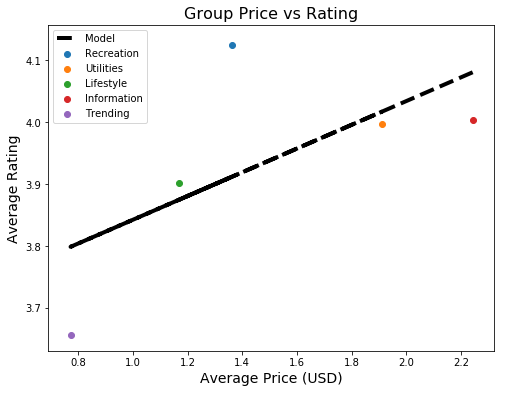

In [40]:
#Price vs. Rating scatter plot by group
name = ['Information', 'Lifestyle', 'Trending', 'Recreation', 'Utilities']

plt.figure(figsize=(8,6))
plt.scatter(rec_mean['price_mean'], rec_mean['rating_mean'], 
            label='Recreation')
plt.scatter(utilities_mean['price_mean'], utilities_mean['rating_mean'], 
            label='Utilities')
plt.scatter(life_mean['price_mean'], life_mean['rating_mean'], 
            label='Lifestyle')
plt.scatter(info_mean['price_mean'], info_mean['rating_mean'], 
            label='Information')
plt.scatter(trending_mean['price_mean'], trending_mean['rating_mean'], 
            label='Trending')

xs = df_group['app_store_price (USD)']
ys = 0.1918 * xs + 3.6505
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Average Price (USD)', fontsize = 14)
plt.ylabel('Average Rating', fontsize = 14)
plt.title('Group Price vs Rating', fontsize = 16)
plt.legend()
plt.show()

#### Interpretation of graph above:

This distribution shows the average price plotted against the average rating for each category. A trendline shows an upwards distribution of the data. However, it is important to note that the ratings scale contains ordinal data. This graph shows that categories with higher average prices, such as Information and Utilities, tend to have higher ratings. Less expensive groups, most notably Trending, have lower ratings. The group with the highest average rating, Recreation, had the median average price.

Conclusions can be drawn regarding the type of app and its goals when determining average price. The type of application may also factor in to the rating it receives, not necessarily due to the quality or price of the app itself.

In [41]:
# Using Mann-Whitney U test to check difference between distributions of groups
MW_group_stat, MW_group_p_val = stats.mannwhitneyu(df_group['app_store_price (USD)'], 
                                                   df_group['user_rating'])
MW_group_stat, MW_group_p_val

(0.0, 0.0060928901776724064)

In [42]:
# Check p-value of Mann-Whitney U test
check_test(MW_group_p_val, alpha)

Different distribution (reject H0)


In [43]:
# Using a two-sample Kolmogorov-Smirnov test to check difference in distribution
KS_group_stat, KS_group_p_val = stats.ks_2samp(df_group['user_rating'], 
                                               df_group['app_store_price (USD)'])
KS_group_stat, KS_group_p_val

(1.0, 0.0037813540593701006)

In [44]:
# Check p-value of Kolmogorov-Smirnov test
check_test(KS_group_p_val, alpha)

Different distribution (reject H0)


The p-value found by the Mann-Whitney U test for the group data was 0.0061. Compared to our critical value of ⍺=0.05, there is a significant relationship between app price and user ratings within groups. As such, we can reject the null hypothesis. Using the Kolmogorov-Smirnov test, we found a p-value of 0.0038. With a critical value of ⍺=0.05, we can again conclude a significant relationship between our two variables.

# Ethics & Privacy

Our analysis involves data regarding financials and user patterns for mobile iOS applications under Apple, one of the largest app stores worldwide. Although their App Store is one of the top competitors, one consideration is that our findings cannot be directly applied to other platforms because the patterns found are unique to Apple. This study will allow us to infer characteristics about Apple users, but not necessarily of the general population. Demographics regarding Apple customers may influence trends discovered in the dataset. If Apple customers tend to be of a certain socioeconomic status or from a certain location, our findings will reflect those factors. Because of this bias, it is important that we consider this limitation in our analysis and conclusion.

Users’ ratings can inaccurately reflect true opinions on an application. For example, if there are in-app incentives for people to rate an app, a person may do so only to receive a reward and not be completely honest about their decision. It is also important to note that people are more likely to rate an app in certain scenarios, such as having a negative experience, in order to voice their disapproval. Knowing that a product costs money can make a negative experience seem worse than what the same inconvenience would be perceived as if the app were free. This bias can influence ratings. Another aspect regarding the accuracy of opinions reflected in app ratings is the subjectivity of what qualifies as “1 star” versus “2 stars” between each person. This inconsistency between customers can misrepresent how well an app’s price actually matches its quality. However, there is always room for personal interpretation when it comes to judging what an overall rating conveys before purchase.

To perform our analysis, our dataset includes statistics acquired directly from the iTunes Search API and not from the customers themselves. Because the data came from the Apple Inc. website, there is a possibility that customers were not notified about the acquisition of data regarding apps they downloaded and the information extracted from such activity, such as customer names. Although there is no personal user information linked to the dataset used in this analysis, some individuals may be concerned that private information can be tracked to them by analyzing further application details accessible by Apple Inc. 

Depending on our conclusions of this project, companies may use the findings to take advantage of customer patterns. For example, if it is found that more expensive applications tend to have higher ratings, a company may assume that their audience is willing to invest more for quality service. A company may raise its app prices, and include minor features and improvements to shallowly justify the increased prices while gaining more revenue. However, in opposition to this strategy to increase revenue, it is possible that higher expectations of customers will not be met and would lead to poorer ratings that would ultimately hurt a company’s success. The importance of how well a company stands against competitors can influence how our analysis is interpreted and used. To prevent this consequence, a disclaimer stating that our project is just an analysis of trends found in a portion of the Apple app store is vital. We are not stating any cause-effect relationships so lower or higher prices should not be automatically associated with either higher or lower ratings. 

In addition, it would be important for us to take caution in how individuals may interpret our findings. Whether or not an application is free does not necessarily mean it is better or worse than competing apps. Every product is unique to themselves and is priced according to what a company sees fit regarding features and projected usage. It would be beneficial that we remind readers that researching mobile iOS will allow them to make insightful decisions about what is suitable to them. Our findings cannot be generalized to every product in the App Store. It is merely an expression of trends evident among users and supposed traits consumers elicit. 

# Conclusion & Discussion

Analyzing trends between iOS mobile app prices and prices revealed that there is a relationship between the variables. By first graphing the data independent of the opposite variable, we were able to see the frequency distribution for rating and price alone. By doing so, we saw that the variables’ distributions were different. Initially, comparing price and rating elicited a weak correlation of 0.0246 due to the large amount of free apps in our dataset. In order to directly compare the variables and account for the unbalanced frequency, it was useful to average the prices of apps under each rating category. This revealed a general trend where higher-rated applications, 4 or 5 stars, had higher prices. Apart from data visualizations, a p-value of 0.0052 from the Mann-Whitney U test compared to a critical value of ⍺ = 0.05 supported that there is a significant relationship. Also, using the Kolmogorov-Smirnov test, we acquired a p-value of 0.0034 and compared to a critical value of ⍺ = 0.05, there is a relationship between application price and user rating.

To further analyze our dataset, we also categorized the apps into five groups to determine if there was a trend between app group, price and rating.This allowed us to account for categories that are underrepresented, such as Catalogs, compared to larger categories like Games. This analysis rejected our hypothesis that the utilities apps would be, on average, most expensive, followed by lifestyle, information, recreation, and trending apps. Based on our visualization, information was the most expensive, then utilities, recreation, lifestyle and trending. Using this analysis, we were able to predict what group an app was likely to be under given its price and rating. This provided more insight as to what types of apps are often judged as being worth its price point. The data analysis we ran on the grouped data yielded similar results as the previous stats test we ran on the entire dataset. The p-value found by the Mann-Whitney U test for the grouped data was 0.0061. Compared to our critical value of ⍺ = 0.05, there is a significant relationship between app price and user ratings within groups. As such, we can reject the null hypothesis. Using the Kolmogorov-Smirnov test, we found a p-value of 0.0038. With a critical value of ⍺ = 0.05, we can again conclude a significant relationship between our two variables.

Having analyzed such trends, our findings provide insight toward the balance between customer expectations of app performance and the quality received. Higher-priced apps are expected to offer more and better services, and since the data revealed that more costly apps had generally higher ratings, customers were satisfied with what they had to pay for. 

One limitation encountered in our analysis was the factor that store app prices do not reflect in-app purchases. Our dataset only considered the price users have to pay in order to download an app. After download, in-app purchases may be required to access quality features which may leave a negative impression on users, leading to lower app ratings. This disapproval would reflect in cheaper apps instead of apps whose price should reflect the additional spending. An additional limitation is the fact that ratings may not be purely reflective of the quality of the app itself, but from the user’s pre-conceived notions of the app. Another limitation was that our dataset consisted of data only from Apple users. As previously stated, we can only draw conclusions from our analysis of the Apple population and not from other populations like Android. If we had access to a dataset providing the same information for other devices, our study would be more inclusive and informative about mobile users as a whole. This is something we could consider incorporating into our project if we wanted to study a broader population.